In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

1.0

In [31]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
train_images.shape

(60000, 28, 28)

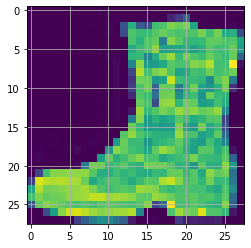

In [42]:
plt.figure()
plt.imshow(train_images[150])
plt.grid(True)

In [43]:
train_images = train_images / 255.0
test_images = test_images / 255.0


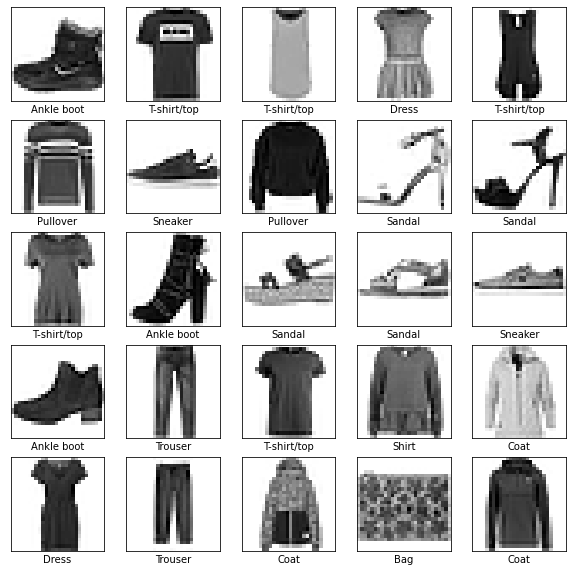

In [57]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()
    

In [61]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), 
keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)]) 


In [64]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [65]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.6310 - accuracy: 0.7806
Epoch 2/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3833 - accuracy: 0.8621
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3412 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3145 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2951 - accuracy: 0.8914


In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 7ms/step - loss: 0.3535 - accuracy: 0.8752


0.8751999735832214

In [67]:
predictions = model.predict(test_images)


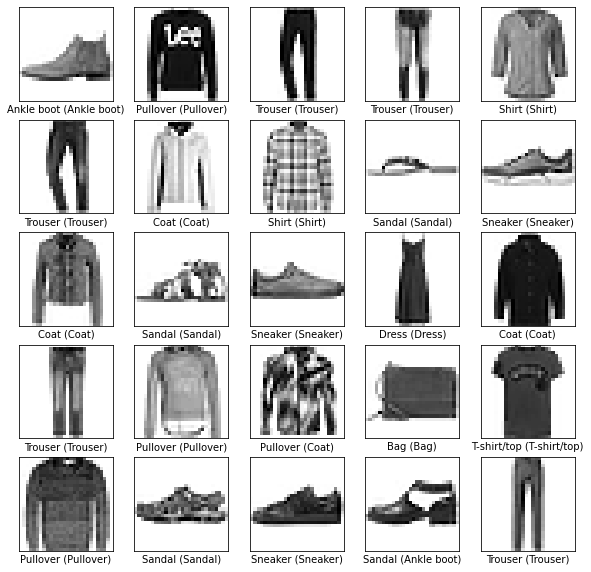

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label], color = color))    
    